This notebook summarizes the results of training.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_loss(ax: matplotlib.axes.Axes, data: pd.DataFrame) -> None:
    ax.plot(data['step'], data['training_loss'],
            label='training', c=plt.cm.Set1(0))
    ax.plot(data['step'], data['validation_loss'],
            label='validation', c=plt.cm.Set1(1))
    ax.set_xlabel('Steps')
    ax.set_ylabel('Cross-entropy')
    ax.grid(True)
    ax.legend(title="Dataset", loc='upper right')
    
def plot_average_precision_score(ax: matplotlib.axes.Axes, data: pd.DataFrame) -> None:
    ax.plot(data['step'], data['training_average_precision_score'],
            label='training', c=plt.cm.Set1(0))
    ax.plot(data['step'], data['validation_average_precision_score'],
            label='validation', c=plt.cm.Set1(1))
    ax.set_xlabel('Steps')
    ax.set_ylabel('Average Precision Score')
    ax.grid(True)
    ax.legend(title="Dataset", loc='lower right')
    
def summarize_training_run(data):
    loss = data[['training_loss', 'validation_loss']].min()
    average_precision_score = data[['training_average_precision_score',
                                    'validation_average_precision_score']].max()
    return pd.DataFrame({'Loss': loss.tolist(),
                         'Average Precision Score': average_precision_score.tolist()},
                        index=['Training', 'Validation'])

In [2]:
from cse547.s3 import deserialize_object

training_log = deserialize_object('cse-547', 'hw3/train/training_log_3a980bcc-3375-470c-a78c-10bcad23d268.pkl')

In [3]:
training_evaluations = pd.DataFrame(training_log['evaluations'])
training_summary = summarize_training_run(training_evaluations)
with open('training_summary.tex', 'w') as f:
    f.write(training_summary.to_latex())
training_summary

,Average Precision Score,Loss
Training,0.483937,0.136209
Validation,0.390272,0.148008


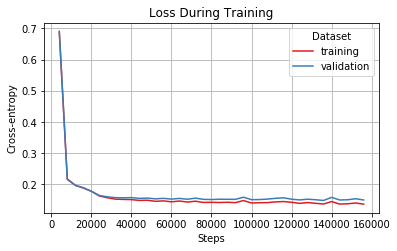

In [4]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_loss(ax, training_evaluations)
ax.set_title('Loss During Training')
fig.savefig('loss.pdf', bbox_inches='tight')

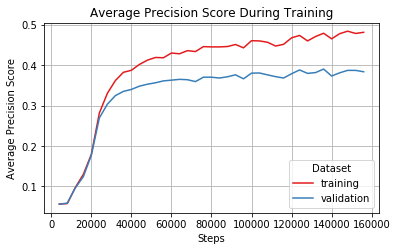

In [5]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_average_precision_score(ax, training_evaluations)
ax.set_title('Average Precision Score During Training')
fig.savefig('average_precision_score.pdf', bbox_inches='tight')